In [33]:
from torchvision import models, transforms
from torchsummary import summary
import torch
import numpy as np
import cv2
import PIL
import matplotlib.pyplot as plt


import sys
import os

current_dir = os.getcwd()
sys.path.append(os.path.dirname(current_dir))

from lib.src import *
from lib.utils import *

from pytorch_grad_cam import GradCAM, HiResCAM, AblationCAM, ScoreCAM, GradCAMPlusPlus, XGradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50


c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Top 10 classes:
wombat: 0.9449 (index: 106)
fox squirrel: 0.0085 (index: 335)
koala: 0.0083 (index: 105)
hamster: 0.0041 (index: 333)
mongoose: 0.0039 (index: 298)
diaper: 0.0030 (index: 529)
mink: 0.0027 (index: 357)
bath towel: 0.0024 (index: 434)
teddy: 0.0017 (index: 850)
tub: 0.0014 (index: 876)


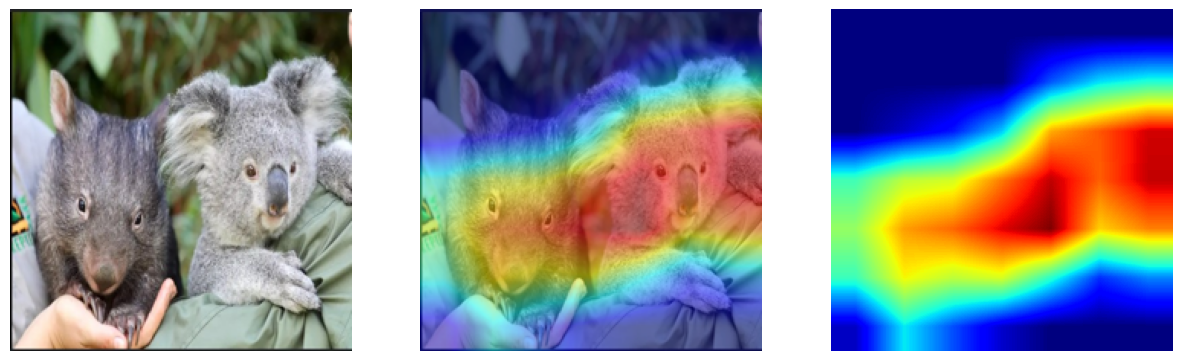

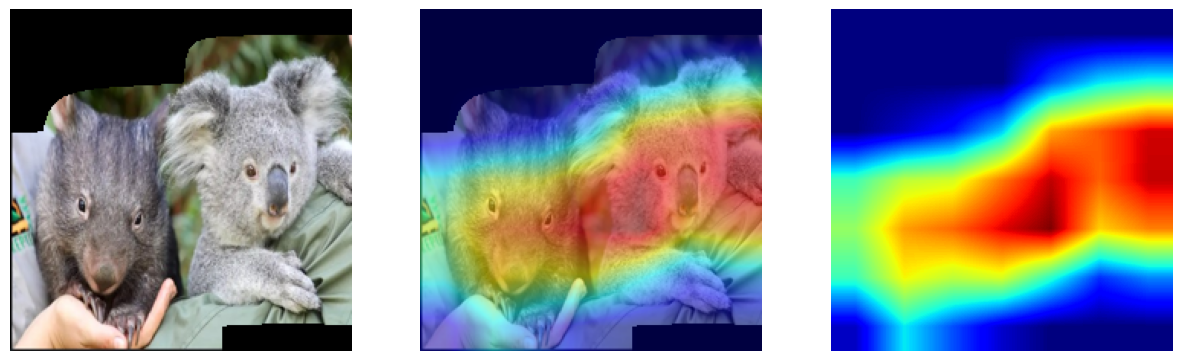

In [34]:

model = models.resnet50(pretrained=True)
target_layers = [model.layer4[-1].conv3]
model.eval()

image_path = 'images/wombat_coala.jpg'
input_tensor = get_image_torch(image_path, 224, 224)

output = model(input_tensor.unsqueeze(0))
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top_probs, top_idxs = torch.topk(probabilities, 10)

class_names = np.loadtxt('imagenet_classes.txt', str, delimiter='\t')

top_classes = {idx.item(): (class_names[idx], prob.item()) for idx, prob in zip(top_idxs, top_probs)}
print("Top 10 classes:")
for idx, (class_name, prob) in top_classes.items():
    print(f"{class_name}: {prob:.4f} (index: {idx})")

selected_class_idx = 105  
cam_husky_lib = get_gradcamplusplus(input_tensor, model, model.layer4[-1].conv3, selected_class_idx)
overlay_plot_torch(input_tensor.squeeze(), cam_husky_lib, 0.5)

del_image = delete_the_least_important_pixels(input_tensor, cam_husky_lib, 0.01)
overlay_plot_torch(del_image, cam_husky_lib, 0.5)

del_image_np = del_image.permute(1, 2, 0).detach().cpu().numpy()
del_image_np = (del_image_np * 255).astype(np.uint8)
del_image_pil = Image.fromarray(del_image_np)
del_image_pil.save('images/del_wombat_coala.jpg')


Top 10 classes:
wombat: 0.9215 (index: 106)
fox squirrel: 0.0210 (index: 335)
diaper: 0.0115 (index: 529)
koala: 0.0106 (index: 105)
mink: 0.0063 (index: 357)
mongoose: 0.0031 (index: 298)
cradle: 0.0022 (index: 516)
hamster: 0.0021 (index: 333)
bath towel: 0.0018 (index: 434)
Arctic fox: 0.0018 (index: 279)


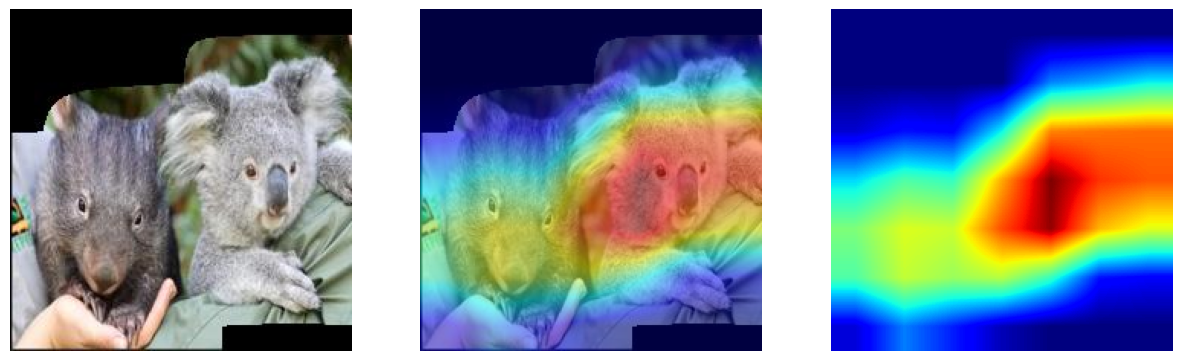

In [35]:
model = models.resnet50(pretrained=True)
target_layers = [model.layer4[-1].conv3]
model.eval()

image_path2 = 'images/del_wombat_coala.jpg'
input_tensor = get_image_torch(image_path2, 224, 224)

output = model(input_tensor.unsqueeze(0))
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top_probs, top_idxs = torch.topk(probabilities, 10)

class_names = np.loadtxt('imagenet_classes.txt', str, delimiter='\t')

top_classes = {idx.item(): (class_names[idx], prob.item()) for idx, prob in zip(top_idxs, top_probs)}
print("Top 10 classes:")
for idx, (class_name, prob) in top_classes.items():
    print(f"{class_name}: {prob:.4f} (index: {idx})")

selected_class_idx = 105  
cam_husky_lib = get_gradcamplusplus(input_tensor, model, model.layer4[-1].conv3, selected_class_idx)
overlay_plot_torch(input_tensor.squeeze(), cam_husky_lib, 0.5)

Top 10 classes:
wombat: 0.9449 (index: 106)
fox squirrel: 0.0085 (index: 335)
koala: 0.0083 (index: 105)
hamster: 0.0041 (index: 333)
mongoose: 0.0039 (index: 298)
diaper: 0.0030 (index: 529)
mink: 0.0027 (index: 357)
bath towel: 0.0024 (index: 434)
teddy: 0.0017 (index: 850)
tub: 0.0014 (index: 876)


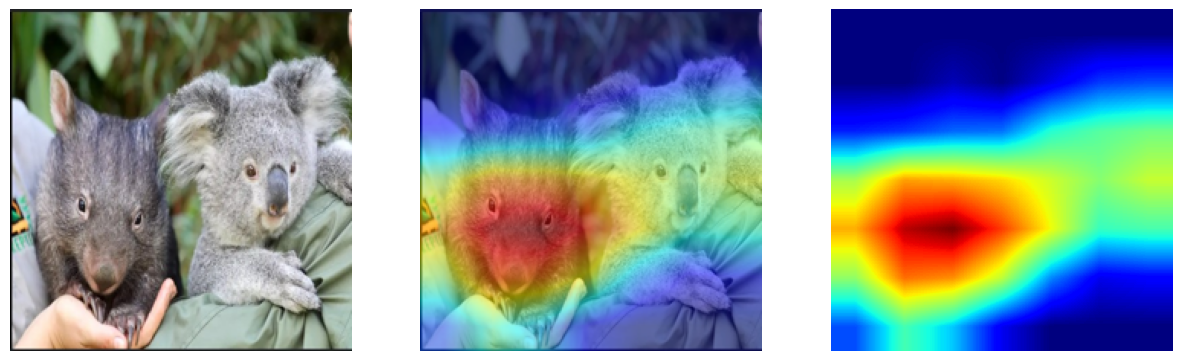

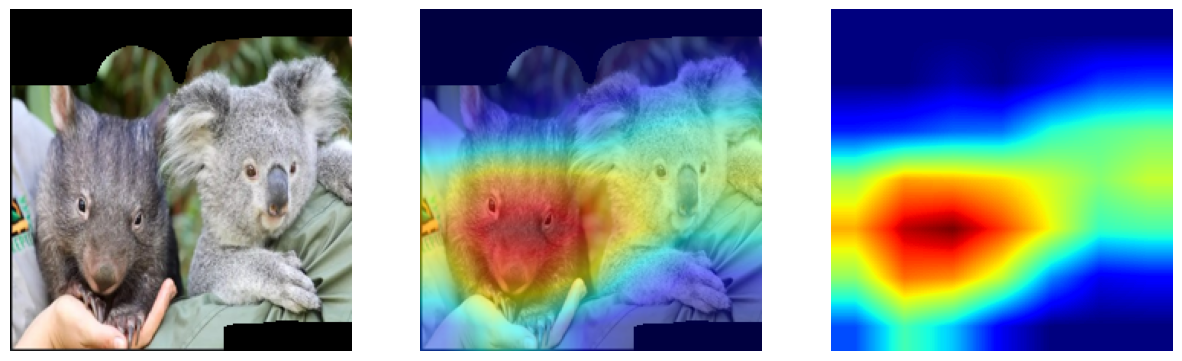

In [36]:

model = models.resnet50(pretrained=True)
target_layers = [model.layer4[-1].conv3]
model.eval()

image_path3 = 'images/wombat_coala.jpg'
input_tensor = get_image_torch(image_path3, 224, 224)

output = model(input_tensor.unsqueeze(0))
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top_probs, top_idxs = torch.topk(probabilities, 10)

class_names = np.loadtxt('imagenet_classes.txt', str, delimiter='\t')

top_classes = {idx.item(): (class_names[idx], prob.item()) for idx, prob in zip(top_idxs, top_probs)}
print("Top 10 classes:")
for idx, (class_name, prob) in top_classes.items():
    print(f"{class_name}: {prob:.4f} (index: {idx})")

selected_class_idx = 106  
cam_husky_lib = get_gradcamplusplus(input_tensor, model, model.layer4[-1].conv3, selected_class_idx)
overlay_plot_torch(input_tensor.squeeze(), cam_husky_lib, 0.5)

del_image = delete_the_least_important_pixels(input_tensor, cam_husky_lib, 0.01)
overlay_plot_torch(del_image, cam_husky_lib, 0.5)

del_image_np = del_image.permute(1, 2, 0).detach().cpu().numpy()
del_image_np = (del_image_np * 255).astype(np.uint8)
del_image_pil = Image.fromarray(del_image_np)
del_image_pil.save('images/del_wombat_coala_2.jpg')


Top 10 classes:
wombat: 0.9395 (index: 106)
fox squirrel: 0.0178 (index: 335)
koala: 0.0091 (index: 105)
mink: 0.0062 (index: 357)
diaper: 0.0041 (index: 529)
hamster: 0.0024 (index: 333)
teddy: 0.0018 (index: 850)
mongoose: 0.0017 (index: 298)
skunk: 0.0014 (index: 361)
cradle: 0.0011 (index: 516)


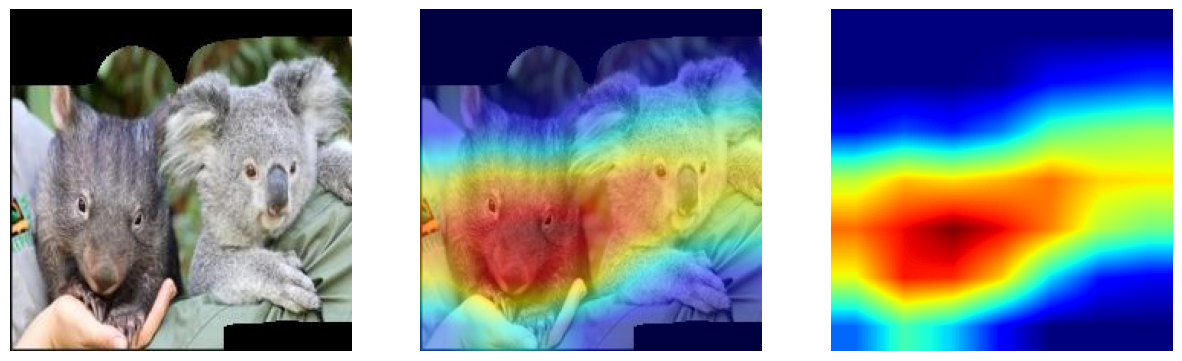

In [37]:
model = models.resnet50(pretrained=True)
target_layers = [model.layer4[-1].conv3]
model.eval()

image_path4 = 'images/del_wombat_coala_2.jpg'
input_tensor = get_image_torch(image_path4, 224, 224)

output = model(input_tensor.unsqueeze(0))
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top_probs, top_idxs = torch.topk(probabilities, 10)

class_names = np.loadtxt('imagenet_classes.txt', str, delimiter='\t')

top_classes = {idx.item(): (class_names[idx], prob.item()) for idx, prob in zip(top_idxs, top_probs)}
print("Top 10 classes:")
for idx, (class_name, prob) in top_classes.items():
    print(f"{class_name}: {prob:.4f} (index: {idx})")

selected_class_idx = 106
cam_husky_lib = get_gradcamplusplus(input_tensor, model, model.layer4[-1].conv3, selected_class_idx)
overlay_plot_torch(input_tensor.squeeze(), cam_husky_lib, 0.5)

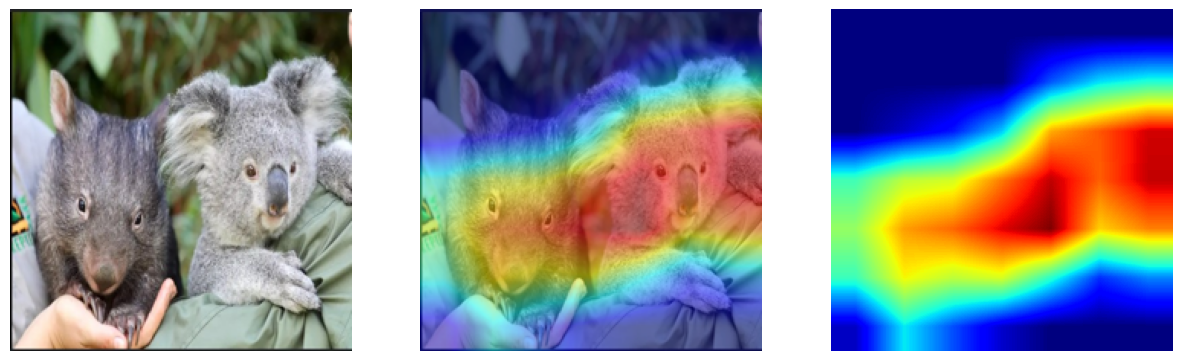

Softmax dla klasy 105 (koala): 0.008282252587378025


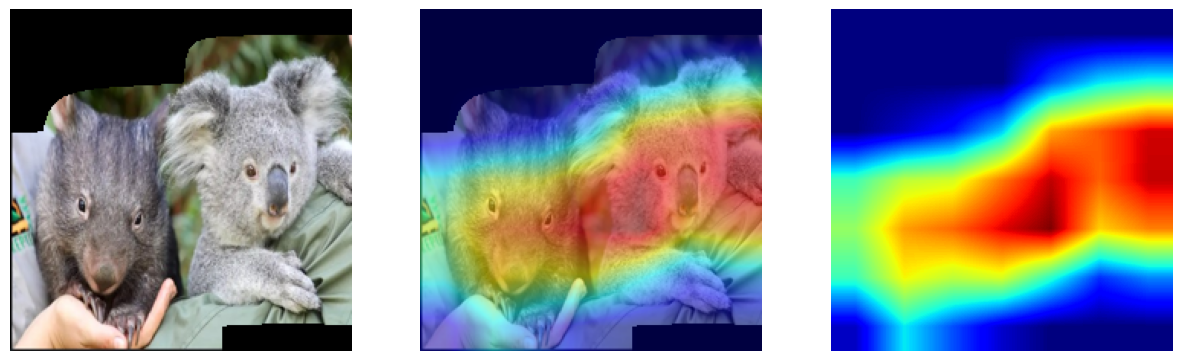

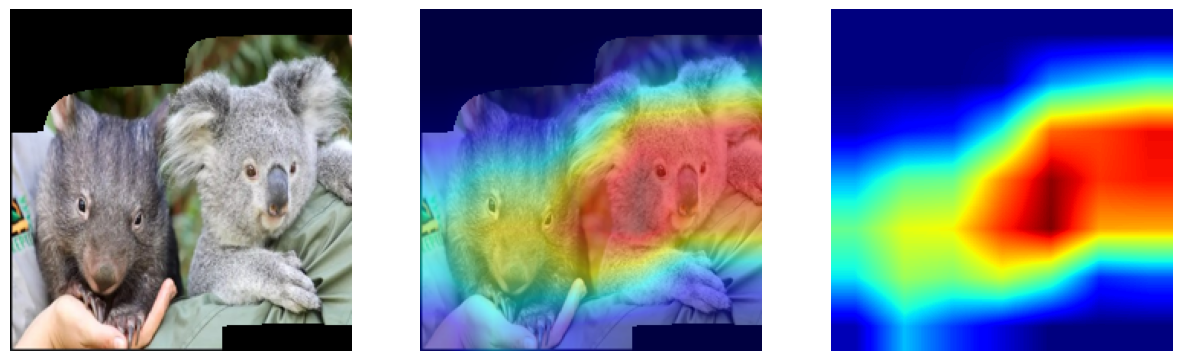

Softmax dla klasy 105 (koala) po usunięciu tła: 0.01639624312520027


In [38]:
current_dir = os.getcwd()
sys.path.append(os.path.dirname(current_dir))

model = models.resnet50(pretrained=True)
target_layers = [model.layer4[-1].conv3]
model.eval()

image_path = 'images/wombat_coala.jpg'
input_tensor = get_image_torch(image_path, 224, 224)


cam_koala = get_gradcamplusplus(input_tensor, model, model.layer4[-1].conv3, 105)
overlay_plot_torch(input_tensor.squeeze(), cam_koala, 0.5)

model.eval()
out = model(input_tensor.unsqueeze(0))
out = torch.nn.functional.softmax(out, dim=1)
print(f"Softmax dla klasy 105 (koala): {out[0, 105].item()}")

del_tensor = delete_the_least_important_pixels(input_tensor.squeeze(), cam_koala, 0.01)
overlay_plot_torch(del_tensor, cam_koala, 0.5)

cam_koala = get_gradcamplusplus(del_tensor, model, model.layer4[-1].conv3, 105)
overlay_plot_torch(del_tensor, cam_koala, 0.5)

model.eval()
out = model(del_tensor.unsqueeze(0))
out = torch.nn.functional.softmax(out, dim=1)
print(f"Softmax dla klasy 105 (koala) po usunięciu tła: {out[0, 105].item()}")

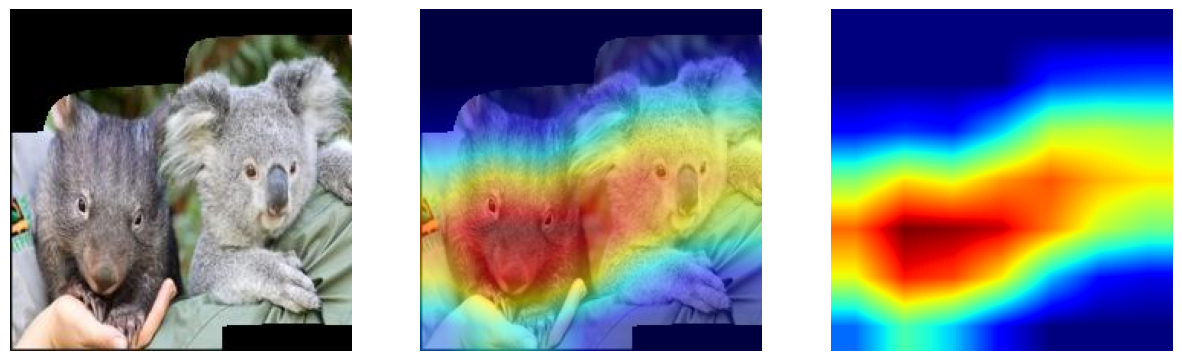

Softmax dla klasy 106 (wombat): 0.9214789271354675


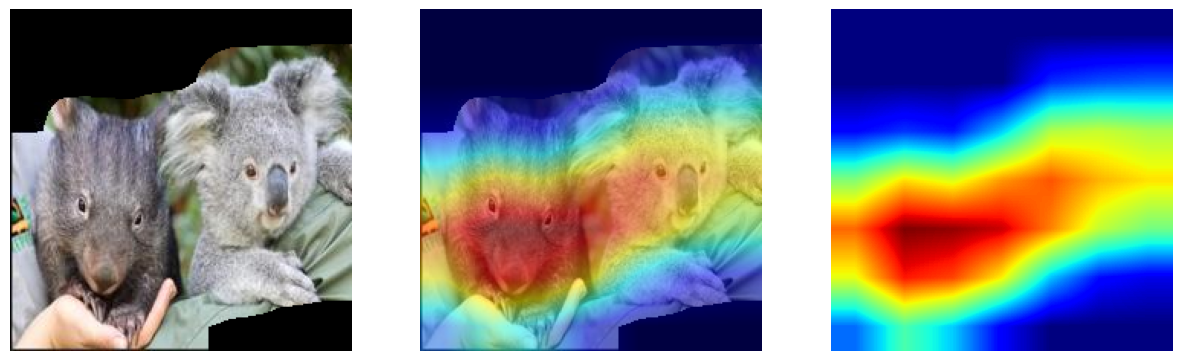

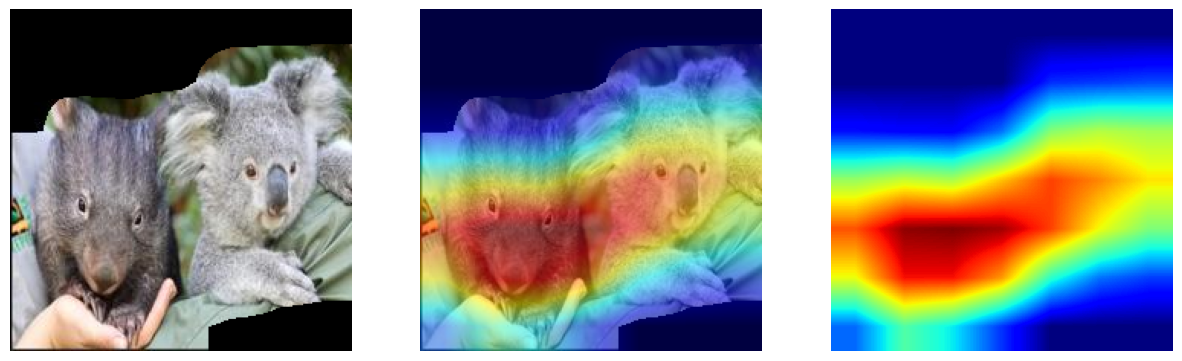

Softmax dla klasy 106 (wombat) po usunięciu tła: 0.9403054714202881


In [42]:
image_path2 = 'images/del_wombat_coala.jpg'
input_tensor2 = get_image_torch(image_path2, 224, 224)

cam_wombat = get_gradcamplusplus(input_tensor2, model, model.layer4[-1].conv3, 106)
overlay_plot_torch(input_tensor2.squeeze(), cam_wombat, 0.5)

model.eval()
out = model(input_tensor2.unsqueeze(0))
out = torch.nn.functional.softmax(out, dim=1)
print(f"Softmax dla klasy 106 (wombat): {out[0, 106].item()}")

del_tensor2 = delete_the_least_important_pixels(input_tensor2.squeeze(), cam_wombat, 0.05)
overlay_plot_torch(del_tensor2, cam_wombat, 0.5)

cam_wombat = get_gradcamplusplus(del_tensor2, model, model.layer4[-1].conv3, 106)
overlay_plot_torch(del_tensor2, cam_wombat, 0.5)

model.eval()
out = model(del_tensor2.unsqueeze(0))
out = torch.nn.functional.softmax(out, dim=1)
print(f"Softmax dla klasy 106 (wombat) po usunięciu tła: {out[0, 106].item()}")